# rapport final

Version actuelle: v2

v1: Premiere analyse, decouverte des datafiles et de la librairie Panda

v2: Amelioration du document, approfondissement de l'analyse


### Sommaire:
* Partie 1:
Exploration des datas
* Partie 2:
Exploration de la librairie Panda
* Partie 3:
Nettoyage des données
* Partie 4:
Debut d'analyse
* Partie 5:
Conclusion

---

### Partie 1
Exploration des datas

Nous commençons par recuperer les données dans les fichiers sources.
Nous creons 2 objets python a partir de fichiers CSV.
Le detail de chaque ligne est precisé directement dans le code suivant (code recupéré puis commentée de @JeffAbrahamson):

In [1]:
import matplotlib
%matplotlib inline

import csv as csv 
import numpy as np

# ouvre le fichier CSV et en cree un objet Python
data_all = [] #cree l'objet
with open('train.csv') as train_file: #ouvre le fichier csv
    csv_reader = csv.reader(train_file, delimiter=',', quotechar='"') #explore le fichier csv grace a la fonction csv.reader
    for row in csv_reader: #pour chaque colonne dans le fichier
        data_all.append(row) #cree un colonne et remplis la donnée
data_all = np.array(data_all) #cree un tableau
data = data_all[1::] #variable qui contient les colonne à partir de la 2nd (1 en code)

# Meme chose qu'au dessus
test_all = []
with open('test.csv') as test_file:
    csv_reader = csv.reader(test_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        test_all.append(row)
test_all = np.array(test_all)
test = test_all[1::]

Code qui permet de recuperer les information sur le nombre de passager total, survivant, seulement sur les hommes puis seulement sur les femmes à bord (code recupéré, modifié, puis commenté de @JeffAbrahamson):

In [2]:
number_passengers = np.size(data[0::,1].astype(np.float)) #nombre de passager total
number_survived = np.sum(data[0::,1].astype(np.float)) #nombre de survivant
proportion_survivors = number_survived/number_passengers # proportion de survivant

women_only_stats = data[0::,4] == "female" #on recupere les lignes concernant seulement les femmmes
men_only_stats = data[0::,4] != "female" #on recupere les lignes concernant seulement les hommes

women_onboard = data[women_only_stats,1].astype(np.float) #on recupere la 2nd collone du tableau seulement pour les femmes  
men_onboard = data[men_only_stats,1].astype(np.float) #on recupere la 2nd collone du tableau seulement pour les hommes  
total_women=np.size(women_onboard) #nombre de femmes à bord (grace au nombre total de lignes)
total_men=np.size(men_onboard) #nombre d'hommes à bord (grace au nombre total de lignes)
survived_women=np.sum(women_onboard) #nombre de femmes survivantes (grace au nombre de lignes a 1)
survived_men=np.sum(men_onboard) #nombre de d'hommes survivantes (grace au nombre de lignes a 1)

proportion_women_survived = survived_women/total_women #proportion de femmes survivantes
proportion_men_survived = survived_men/total_men #proportion de femmes survivantes

Puis on affiche des stats grace au code precedent:

In [3]:
print'Le total des passagers est',number_passengers,'dont à peu pres',(total_women*100)/number_passengers,'% de femmes et',(total_men*100)/number_passengers,'% d\'hommes'
print'Le total des survivants est {s:.0f} soit'.format(s=number_survived),'{p:.0f}%'.format(p=proportion_survivors*100)
print'{s:.0f}'.format(s=survived_women),'femmes ont survecues sur',total_women,'soit {p:.0f}%'.format(p=proportion_women_survived*100),'de toutes les femmes'
print'{s:.0f}'.format(s=survived_men),'hommes ont survecues sur',total_men,'soit {p:.0f}%'.format(p=proportion_men_survived*100),'de tous les hommes'

Le total des passagers est 891 dont à peu pres 35 % de femmes et 64 % d'hommes
Le total des survivants est 342 soit 38%
233 femmes ont survecues sur 314 soit 74% de toutes les femmes
109 hommes ont survecues sur 577 soit 19% de tous les hommes


---

### Partie 2
Exploration de la librairie Panda et tri des données

Maintenant nous allons utiliser la librairie Panda et explorer un peu ses fonctionnalitées, on commence par afficher des infos sur chaque colonne grace a l'argument ".info()" :

In [4]:
import pandas as pd

datap = pd.read_csv('train.csv', header=0) #contient toutes les données issue de train.csv, ces données sont maintenant exploitable avec panda
datap.info() #affiche chaque colonne et des infos (type, nb valeur, nul ou pas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ou encore un resumé du contenu des colones grace à l'argument ".describe()":

In [5]:
datap.describe() #Prend chaque colonne numerique du tableau et affiche des information (total,moy,ecart type,val mini,val max...)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Grace a la librairie "pylab" on peux afficher des graphiques:
* 1er tableau: Répartition du nombre de passager ayant 1,2,3... membre de sa famille avec lui sur le bateau. On observe qu'une majoritée de passagés sont venu seul.
* 2nd tableau: Répartition du prix du billet payé par passagé. Un majorité de passagés à payé son billet moins de 50€

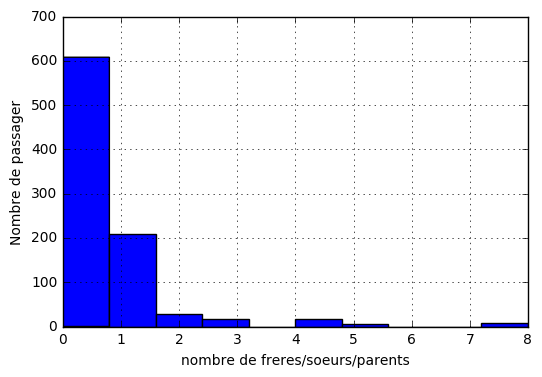

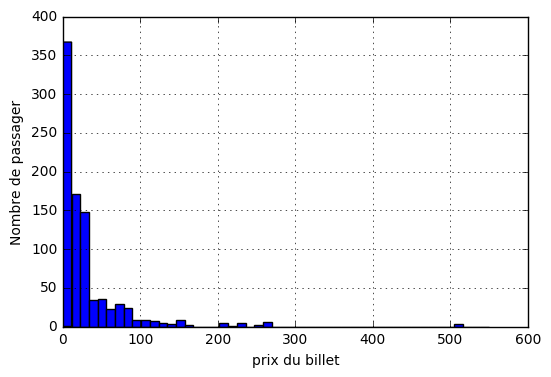

In [6]:
import pylab as P
datap['SibSp'].hist() #cree un tableau avec les infos de la colonne SibSp
P.ylabel('Nombre de passager') #nomme l'axe y
P.xlabel('nombre de freres/soeurs/parents') #nomme l'axe x
P.show() #affiche te tableau

datap['Fare'].hist(bins=np.linspace(0,550,50)) #cree un tableau avec les infos de la colonne Fare et on reduit la largeur de colones pour plus de precision
P.ylabel('Nombre de passager') #nomme l'axe y
P.xlabel('prix du billet') #nomme l'axe x
P.show() #affiche te tableau

### Partie 3
Nettoyage des données

(Ne sachant pas coder, je n'ai pas reussi à realiser cette partie moi-même et j'ai donc recuperé le code d'autres personnes pour pouvoir avancer, et afficher les differents graphiques).

Panda permet aussi de trier des données. En effet les lot de données peuvent arriver avec des cellules vides, mal classées il faut dabord les trier/reformater. Ci dessous le tableaux des données: on observe qu'il manque la colonne homme/femme (elle est presente mais sous forme texte et non numerique) il serai interessant de la rajouter. S'il on regarde la colonne age on voit  qu'il manque l'age de certaines personnes ce qui est ennuyeux pour la suite de nos recherche, nous allons combler les vides.

In [7]:
datap.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nous commençons par rajouter une colonne "gender" qui contientienra 0 ou 1 en fonction du sexe du passager (code recupéré puis commenté de @JeffAbrahamson):

In [8]:
datap['Gender'] = 4 #Ajout d'une colonne
datap['Gender'] = datap['Sex'].map( {'female': 0, 'male': 1} ).astype(int) #on y importe la valeur 0 ou 1 en fonction du sex du passager

Ensuite on fait la mediane d'age pour chaque passager par rapport au sexe et à la classe, ce qui nous donnera une approximation et nous permettra de remplir chaque case vide par la valeur mediane trouvée (code recupéré de @AlexSoudant):

In [9]:
# Création d'un objet de deux lignes et 3 colonnes qui contiendra les medianes des ages pour chaque sexe et classe de passagers
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = datap[(datap['Gender'] == i) & \
                              (datap['Pclass'] == j+1)]['Age'].dropna().median()

# Création d'un dictionnaire contenant ces informations selon le sexe et la classe des passagers
dico_median = {1: ["Femme","1ere Classe", median_ages[0,0]]
                ,2: ["Femme","2nde Classe", median_ages[0,1]]
                ,3: ["Femme","3ieme Classe", median_ages[0,2]]
                ,4: ["Homme","1ere Classe", median_ages[1,0]]
                ,5: ["Homme","2nde Classe", median_ages[1,1]]
                ,6: ["Homme","3ieme Classe", median_ages[1,2]]}

# On commence avec une copie :
datap['AgeFill'] = datap['Age']

# On construire une boucle for imbriquée qui permet de selectionner les valeurs NaN 
# en fonction du sexe et de la classe de passagers ainsi que leur attribuer la nouvelle valeur médiane correspondante :
for i in range(0, 2):
    for j in range(0, 3):
        datap.loc[ (datap.Age.isnull()) & (datap.Gender == i) & 
                (datap.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
datap.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,AgeFill
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,29.112424
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,13.304424
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,21.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,26.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,36.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,80.000000


Grace au nettayage de notre colonne "sexe" on peux maintenant comparer dans un tableau le prix payé par un homme et par une femme, on constate qu'il y a presque un equilibre parfait (sans doute parce qu'ils etaient en couple et ont payé le meme billet):

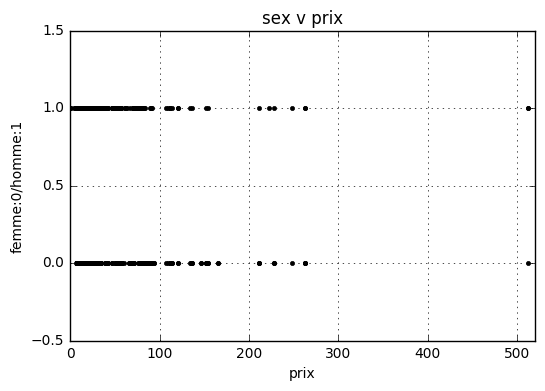

In [10]:
import matplotlib.pyplot as plt

#tableau sur le rapport sex/prix pour tous les passagés
y = datap['Gender'] #donnée en axe y
x = datap['Fare'] #donnée en axe x
plt.figure()
plt.title('sex v prix') #titre du tableau
plt.xlabel('prix') #nomme l'axe x
plt.ylabel(u'femme:0/homme:1') #nomme l'axe y
plt.plot(x, y, 'k.') #place les point en fonction des données des variables x et y
plt.axis([-0.5, 520, -0.5, 1.5]) #fixe la taille du tableau (au niveau valeurs)
plt.grid(True) #affiche la grille
plt.show() #affiche le tableau

#### Partie 4
Debut d'analyse

Grace au nettoyage des données (sex, age) je peux effectuer plusieurs graphiques de regression lineaire.

J'ai produit quelques tableaux de repartitions basées sur plusieurs stats et j'ai ensuite produit des graphiues de regression lineaire pour mettre en avant ce que les tableau demontre.

*  rapport age/survie des plus de 50 ans: on constate qu'a partir de 64 ans les passagées sont tous decedé... ou presque, le plus vieux (80 ans) à lui survecu !
*  Graphique de regression lineaire sur tout les passagées du bateau: on observe que plus le passager est agée plus il a une probabilitée qu'il soit mort (cependant cette tendance est legere).


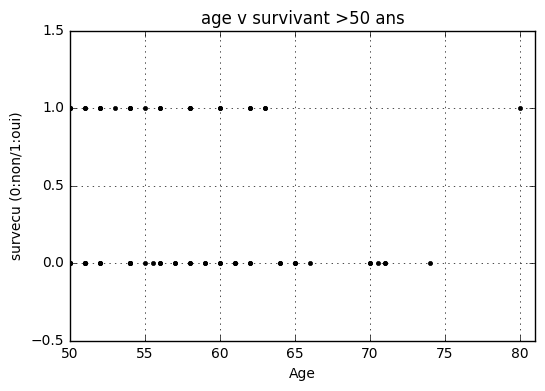

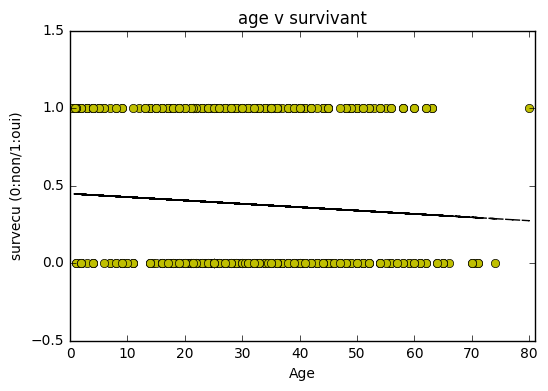

In [11]:
#tableau sur le rapport age/survie pour les passagés de plus de 50 ans
y = datap['Survived']
x = datap['AgeFill']
plt.figure()
plt.title('age v survivant >50 ans')
plt.xlabel('Age')
plt.ylabel(u'survecu (0:non/1:oui)')
plt.plot(x, y, 'k.')
plt.axis([50, 81, -0.5, 1.5])
plt.grid(True)
plt.show()

#graphique de régression linéaire famille/classe
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.title('age v survivant')
plt.xlabel('Age')
plt.ylabel(u'survecu (0:non/1:oui)')
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 81)
plt.ylim(-0.5, 1.5)
plt.show()

*  rapport age/classe pour les moins de 30 ans: on voit qu'une majorité de moins de 15 ans on logé en 3eme classe
*  Regression lineaire sur tout les passagers du bateau: Ce tableau montre clairement que plus le passager est agé plus il a tendance à choisir une classe elevée.

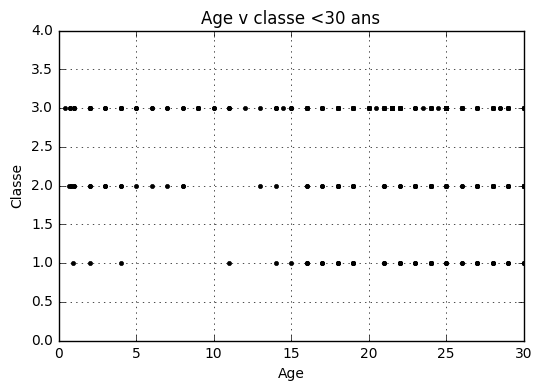

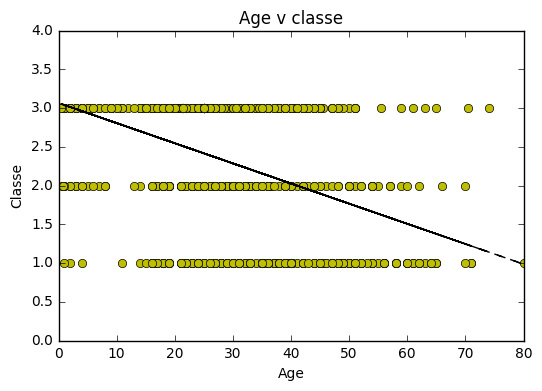

In [12]:
#tableau sur le rapport age/classe pour les passagés de moins de 30 ans
y = datap['Pclass']
x = datap['AgeFill']
plt.figure()
plt.title('Age v classe <30 ans')
plt.xlabel('Age')
plt.ylabel(u'Classe')
plt.plot(x, y, 'k.')
plt.axis([0, 30, 0, 4])
plt.grid(True)
plt.show()

#graphique de régression linéaire age/classe
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.title('Age v classe')
plt.xlabel('Age')
plt.ylabel(u'Classe')
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 80)
plt.ylim(0, 4)
plt.show()

*  Un graphique de regression lineaire sur le rapport famille/classe qui met en avant que plus il y a de membre de la famille moins les passager choisissent une classe elevée. on voit qu'a partir de 4 personnes dans un famille les membres logent toujours en 3eme classe

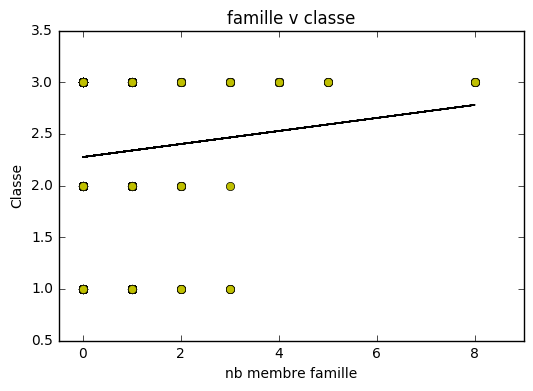

In [13]:
#graphique de régression linéaire famille/classe
y = datap['Pclass']
x = datap['SibSp']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.title('famille v classe')
plt.xlabel('nb membre famille')
plt.ylabel(u'Classe')
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(-0.5, 9)
plt.ylim(0.5, 3.5)
plt.show()

#### Partie 5
Conclusion

Ce qu'on peut tirer de ces differentes recherches 